# Import libaries

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

%matplotlib inline

# Import dataset

In [25]:
df = pd.read_excel('Final_Dataset.xlsx')
df = df.drop(['Index',
           'Date',
           'index',
           'Author name',
           'University',
           'country',
           'Google Scholar link of the university',
           'Google Scholar link of the author',
           'Qs uni world ranking',
           'Qs uni country ranking',
           'Date of the first publication (year)',
           'Date of the last publication (year)',
            ], axis=1)
cols = df.columns
main_df = df

## MinMax Scaler

In [26]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(main_df)
min_maxed_df = pd.DataFrame(scaled, columns=[cols])
min_maxed_df

,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
0,0.161649,0.557047,0.571429,0.751584,0.542889,0.454807,0.0,0.0,0.028689,0.021188,0.024367,0.024367,0.012376,0.010946,0.283081,0.495577,0.000000
1,0.137881,0.510067,0.467437,0.696232,0.389596,0.352322,0.0,0.0,0.069469,0.077349,0.033359,0.033359,0.030198,0.010077,0.101253,0.192491,0.010101
2,0.123603,0.503356,0.386555,0.316772,0.057001,0.113230,0.0,0.0,0.028689,0.030591,0.022648,0.022648,0.018317,0.019864,0.148098,0.142961,0.020202
3,0.118338,0.298658,0.115546,0.124708,0.048700,0.245333,0.0,0.0,0.106954,0.146178,0.083440,0.083440,0.012376,0.048258,0.207233,0.082368,0.030303
4,0.112919,0.392617,0.215861,0.345448,0.219148,0.399229,0.0,0.0,0.056307,0.076458,0.060220,0.060220,0.028218,0.016639,0.088640,0.102119,0.040404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,0.002217,0.057047,0.013130,0.039013,0.026010,0.416410,0.0,0.0,0.003105,0.232127,0.001928,0.001928,0.025248,0.002856,0.001936,0.012914,0.959596
11937,0.002220,0.070470,0.013130,0.026676,0.018816,0.438833,0.0,0.0,0.001986,0.145126,0.001681,0.001681,0.012871,0.004175,0.003740,0.017090,0.969697
11938,0.002212,0.043624,0.011029,0.030343,0.016602,0.340909,0.0,0.0,0.006179,0.471724,0.002149,0.002149,0.018317,0.003660,0.002646,0.013781,0.979798
11939,0.002205,0.067114,0.020483,0.028009,0.011068,0.245989,0.0,0.0,0.001600,0.116040,0.001526,0.001526,0.016832,0.003951,0.002864,0.013824,0.989899


## Normalization

In [27]:
df_normalized = preprocessing.normalize(min_maxed_df)
dfcopy = df_normalized
df = pd.DataFrame(df_normalized, columns=[cols])
df

,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
0,0.112684,0.388313,0.398338,0.523923,0.378443,0.317042,0.0,0.0,0.019999,0.014770,0.016986,0.016986,0.008627,0.007631,0.197333,0.345463,0.000000
1,0.120020,0.443992,0.406885,0.606041,0.339127,0.306681,0.0,0.0,0.060470,0.067329,0.029038,0.029038,0.026286,0.008772,0.088137,0.167555,0.008793
2,0.162190,0.660496,0.507231,0.415664,0.074795,0.148579,0.0,0.0,0.037646,0.040141,0.029718,0.029718,0.024035,0.026065,0.194331,0.187592,0.026509
3,0.218054,0.550316,0.212909,0.229791,0.089735,0.452059,0.0,0.0,0.197077,0.269352,0.153748,0.153748,0.022805,0.088922,0.381855,0.151774,0.055837
4,0.148590,0.516647,0.284053,0.454577,0.288377,0.525347,0.0,0.0,0.074094,0.100612,0.079243,0.079243,0.037132,0.021895,0.116642,0.134379,0.053168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,0.002063,0.053091,0.012220,0.036308,0.024206,0.387535,0.0,0.0,0.002890,0.216031,0.001794,0.001794,0.023497,0.002658,0.001802,0.012018,0.893056
11937,0.002060,0.065411,0.012188,0.024761,0.017465,0.407331,0.0,0.0,0.001844,0.134708,0.001561,0.001561,0.011947,0.003875,0.003471,0.015863,0.900087
11938,0.001938,0.038223,0.009664,0.026587,0.014547,0.298702,0.0,0.0,0.005414,0.413322,0.001883,0.001883,0.016049,0.003207,0.002318,0.012075,0.858493
11939,0.002142,0.065180,0.019893,0.027202,0.010749,0.238901,0.0,0.0,0.001554,0.112697,0.001482,0.001482,0.016347,0.003837,0.002782,0.013426,0.961376


# Implement k-means

In [28]:
kmeansInertias = []
for k in range(2,17):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(df)
    clusterCenters = kmeans.cluster_centers_
    kmeansInertias.append(kmeans.inertia_)
    centroidsTable = pd.DataFrame(clusterCenters, columns=df.columns[:17], index = ['C'+str(i+1) for i in range(len(clusterCenters))])
    
    display(centroidsTable)

,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.051641,0.336591,0.159468,0.230584,0.121399,0.597487,0.006695,0.011100,0.041643,0.270973,0.026263,0.026263,0.042811,0.024088,0.069416,0.111295,0.319015
C2,0.011253,0.135370,0.049671,0.073564,0.035968,0.399717,0.001903,0.006589,0.009385,0.225565,0.006217,0.006217,0.020949,0.010762,0.018377,0.045652,0.815970


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.011970,0.144277,0.054430,0.079455,0.038123,0.373501,0.002117,0.006935,0.008536,0.182892,0.006203,0.006203,0.021262,0.010062,0.018983,0.048331,0.849989
C2,0.072960,0.439444,0.227000,0.317389,0.162924,0.544584,0.010146,0.013380,0.046195,0.153826,0.032879,0.032879,0.048772,0.024570,0.093452,0.146561,0.292291
C3,0.013472,0.136670,0.040783,0.071450,0.042228,0.616798,0.001068,0.006295,0.025292,0.452953,0.011616,0.011616,0.027138,0.019369,0.024401,0.045138,0.483790


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.011661,0.138977,0.052085,0.073223,0.032983,0.352185,0.002034,0.006801,0.008359,0.182671,0.006085,0.006085,0.020304,0.010059,0.018747,0.045641,0.866466
C2,0.017268,0.120886,0.034970,0.050367,0.023669,0.462044,0.000877,0.005966,0.042040,0.638649,0.016551,0.016551,0.022820,0.029056,0.033505,0.034720,0.466487
C3,0.015435,0.198794,0.074219,0.134496,0.084305,0.694922,0.002530,0.007849,0.010742,0.213827,0.008391,0.008391,0.033375,0.010707,0.022404,0.072702,0.550195
C4,0.085550,0.474717,0.252989,0.341486,0.168877,0.506221,0.011627,0.014241,0.054152,0.154184,0.038296,0.038296,0.050587,0.027277,0.108651,0.155962,0.243325


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.015168,0.106488,0.029953,0.040880,0.017689,0.421090,0.000799,0.005757,0.039085,0.637934,0.014607,0.014607,0.020486,0.028184,0.030518,0.030416,0.523780
C2,0.016853,0.194076,0.078234,0.127949,0.072851,0.566679,0.003361,0.008794,0.010701,0.180202,0.008281,0.008281,0.031085,0.010023,0.023748,0.069923,0.709564
C3,0.092782,0.496007,0.270987,0.356074,0.170347,0.468325,0.012439,0.014739,0.056942,0.141802,0.040264,0.040264,0.051032,0.027854,0.117384,0.161996,0.248052
C4,0.020865,0.227197,0.080513,0.152604,0.099277,0.787795,0.001986,0.006944,0.021219,0.295954,0.014209,0.014209,0.039092,0.016490,0.031463,0.079451,0.303828
C5,0.010280,0.126477,0.045641,0.061090,0.024887,0.309849,0.001729,0.006322,0.007663,0.180148,0.005559,0.005559,0.017272,0.010024,0.017284,0.040236,0.894531


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.005100,0.092081,0.026369,0.053968,0.034917,0.555518,0.000644,0.004614,0.005714,0.260743,0.003709,0.003709,0.020398,0.006661,0.009077,0.036265,0.751657
C2,0.019237,0.223352,0.078715,0.150764,0.098673,0.789658,0.002290,0.007706,0.018211,0.278899,0.012719,0.012719,0.039149,0.015074,0.028790,0.078664,0.328522
C3,0.098847,0.502847,0.277732,0.366891,0.177939,0.473947,0.012300,0.014451,0.062817,0.146965,0.043838,0.043838,0.051487,0.029029,0.123773,0.164268,0.185293
C4,0.018061,0.118914,0.034092,0.045708,0.019424,0.413503,0.000927,0.006430,0.047380,0.682085,0.017588,0.017588,0.022399,0.033131,0.036446,0.032664,0.459415
C5,0.038543,0.336258,0.157567,0.220797,0.108524,0.476176,0.007790,0.013460,0.021046,0.127449,0.016466,0.016466,0.040843,0.017262,0.052374,0.111974,0.678694
C6,0.009737,0.127099,0.045046,0.060436,0.024464,0.287458,0.001578,0.006390,0.007513,0.169858,0.005421,0.005421,0.017158,0.010165,0.016760,0.040292,0.907487


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.009571,0.129446,0.046261,0.063610,0.026898,0.306564,0.001530,0.005896,0.006558,0.144858,0.005118,0.005118,0.017702,0.009249,0.016071,0.041700,0.908449
C2,0.025671,0.154768,0.046582,0.066211,0.031117,0.502238,0.001197,0.007471,0.062488,0.692895,0.024573,0.024573,0.028088,0.037830,0.046078,0.043240,0.311258
C3,0.040964,0.348534,0.164972,0.226669,0.108773,0.461772,0.008518,0.013909,0.022195,0.127795,0.017310,0.017310,0.042680,0.017984,0.055296,0.113668,0.676794
C4,0.102757,0.511577,0.285985,0.372927,0.177587,0.458087,0.012589,0.014718,0.063752,0.141088,0.044863,0.044863,0.052317,0.029479,0.128662,0.166170,0.180608
C5,0.022141,0.250114,0.093600,0.177377,0.116685,0.795070,0.002563,0.008088,0.017472,0.240804,0.013387,0.013387,0.039596,0.015218,0.033145,0.090027,0.306040
C6,0.005633,0.107881,0.032650,0.068197,0.045425,0.614987,0.001061,0.005432,0.004864,0.224371,0.003715,0.003715,0.022957,0.006265,0.009684,0.043900,0.712837
C7,0.007564,0.078642,0.020993,0.029524,0.012502,0.345997,0.000663,0.005616,0.016132,0.482943,0.006821,0.006821,0.015520,0.015622,0.015690,0.023873,0.764160


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.008131,0.080778,0.021504,0.029593,0.012296,0.348844,0.000581,0.005136,0.017964,0.512197,0.007416,0.007416,0.015506,0.017586,0.017264,0.024191,0.740850
C2,0.110421,0.524907,0.299685,0.381153,0.175293,0.427903,0.013554,0.015236,0.068355,0.135968,0.047851,0.047851,0.051453,0.030723,0.138565,0.169851,0.170795
C3,0.031971,0.309132,0.126453,0.229601,0.148432,0.771268,0.003608,0.008572,0.024094,0.218005,0.018065,0.018065,0.044799,0.017754,0.044896,0.110876,0.240413
C4,0.005941,0.105539,0.034251,0.065215,0.039976,0.493956,0.001116,0.005448,0.004541,0.178688,0.003542,0.003542,0.020638,0.005890,0.009501,0.040617,0.822010
C5,0.026956,0.159226,0.048165,0.068523,0.032284,0.504161,0.001359,0.008536,0.066079,0.702455,0.025935,0.025935,0.029094,0.038844,0.048892,0.044396,0.282421
C6,0.007506,0.132145,0.039337,0.080108,0.053052,0.722452,0.001174,0.006189,0.007085,0.277800,0.005183,0.005183,0.028346,0.008547,0.012578,0.049678,0.565824
C7,0.042469,0.357028,0.169848,0.232898,0.112056,0.468059,0.008536,0.013689,0.023010,0.128106,0.017941,0.017941,0.042663,0.018296,0.056902,0.116649,0.663569
C8,0.011191,0.138664,0.050861,0.064598,0.023815,0.259828,0.001895,0.006489,0.007687,0.146198,0.005884,0.005884,0.017312,0.010739,0.018960,0.042924,0.921138


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.009043,0.085199,0.022929,0.031000,0.012578,0.346879,0.000669,0.005680,0.019855,0.532690,0.008153,0.008153,0.016059,0.019056,0.019077,0.025045,0.725115
C2,0.047446,0.387951,0.187499,0.267184,0.136342,0.533332,0.009369,0.013862,0.026387,0.138643,0.020281,0.020281,0.042345,0.018981,0.061938,0.131027,0.560834
C3,0.113314,0.528505,0.302383,0.382747,0.175304,0.422776,0.013406,0.014714,0.070575,0.136786,0.049337,0.049337,0.052334,0.031427,0.142108,0.170360,0.153998
C4,0.029489,0.273953,0.122015,0.159945,0.070047,0.368259,0.005800,0.012619,0.016360,0.111473,0.012878,0.012878,0.034766,0.015467,0.041667,0.084765,0.818577
C5,0.007682,0.136220,0.040496,0.081657,0.053634,0.732190,0.001193,0.006414,0.007230,0.282078,0.005332,0.005332,0.028577,0.008906,0.012826,0.050781,0.549811
C6,0.027463,0.160078,0.048657,0.069308,0.032689,0.503192,0.001337,0.008321,0.068099,0.707092,0.026530,0.026530,0.029549,0.039175,0.049340,0.044480,0.273862
C7,0.006671,0.106110,0.034198,0.045636,0.016885,0.260542,0.000906,0.004716,0.005325,0.162169,0.004067,0.004067,0.014616,0.009238,0.013141,0.034007,0.929467
C8,0.004493,0.091022,0.027295,0.056445,0.036367,0.516020,0.000807,0.004699,0.003931,0.199791,0.002953,0.002953,0.019544,0.005368,0.007683,0.036705,0.807246
C9,0.030752,0.299420,0.120839,0.224618,0.148088,0.784136,0.003518,0.008664,0.024296,0.227114,0.017954,0.017954,0.045520,0.017694,0.043669,0.107961,0.214360


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.004275,0.088398,0.026225,0.053164,0.033440,0.494981,0.000717,0.004301,0.003782,0.194840,0.002833,0.002833,0.018654,0.005289,0.007355,0.034977,0.824016
C2,0.073773,0.442859,0.287287,0.437321,0.244138,0.525861,0.012560,0.010172,0.034258,0.097668,0.025761,0.025761,0.053282,0.014329,0.079499,0.177650,0.165515
C3,0.024931,0.149111,0.044920,0.064779,0.031097,0.496389,0.001222,0.008046,0.064274,0.714997,0.024425,0.024425,0.028652,0.037920,0.045483,0.041935,0.287114
C4,0.029904,0.276358,0.123857,0.162673,0.071469,0.369687,0.005916,0.012837,0.016490,0.111224,0.012981,0.012981,0.034771,0.015536,0.042333,0.086659,0.815091
C5,0.006976,0.108998,0.035356,0.046314,0.016611,0.250794,0.000937,0.004889,0.005508,0.161485,0.004218,0.004218,0.014568,0.009599,0.013719,0.034511,0.931944
C6,0.007146,0.130197,0.038924,0.080312,0.053591,0.713416,0.001187,0.005836,0.006542,0.268723,0.004878,0.004878,0.027807,0.008155,0.012081,0.050066,0.584430
C7,0.046213,0.384894,0.183334,0.260981,0.133168,0.547792,0.008759,0.013821,0.026059,0.142848,0.019998,0.019998,0.043532,0.018733,0.059269,0.127978,0.557161
C8,0.026224,0.272232,0.099746,0.181060,0.115833,0.809454,0.002713,0.009186,0.023223,0.264705,0.016810,0.016810,0.042008,0.018092,0.039448,0.093660,0.222145
C9,0.150797,0.598230,0.281253,0.289022,0.095441,0.332052,0.013155,0.020029,0.115569,0.205137,0.077212,0.077212,0.049790,0.054871,0.212810,0.151080,0.174809
C10,0.008929,0.085040,0.023002,0.031314,0.012881,0.350361,0.000652,0.005612,0.019643,0.528331,0.008057,0.008057,0.016136,0.018535,0.018615,0.025012,0.727786


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.050447,0.400492,0.193866,0.269147,0.132710,0.517864,0.009670,0.014258,0.028664,0.142904,0.021756,0.021756,0.036761,0.020422,0.067297,0.133878,0.565462
C2,0.003975,0.083847,0.024376,0.048799,0.029945,0.475010,0.000588,0.004093,0.003671,0.195824,0.002723,0.002723,0.017374,0.005272,0.006992,0.032776,0.837979
C3,0.013326,0.153840,0.043671,0.081537,0.050648,0.769445,0.001165,0.007721,0.019024,0.446235,0.011385,0.011385,0.031238,0.016519,0.022728,0.050530,0.316439
C4,0.119868,0.540997,0.315259,0.391485,0.174867,0.403858,0.014225,0.015357,0.074096,0.135753,0.051736,0.051736,0.036850,0.032121,0.151193,0.176021,0.147919
C5,0.037916,0.346743,0.151497,0.271144,0.174924,0.748022,0.004838,0.009046,0.025645,0.180359,0.019560,0.019560,0.044601,0.017598,0.050079,0.124920,0.222819
C6,0.033720,0.166743,0.050864,0.064232,0.025482,0.398579,0.001431,0.008999,0.087738,0.763049,0.032946,0.032946,0.021165,0.052064,0.064779,0.043893,0.275374
C7,0.007868,0.140422,0.044905,0.091618,0.061159,0.694309,0.001582,0.006796,0.006329,0.223242,0.004913,0.004913,0.027076,0.007548,0.012982,0.055603,0.624187
C8,0.044553,0.200064,0.100462,0.152535,0.082611,0.263407,0.004329,0.002272,0.033166,0.121184,0.021078,0.021078,0.786005,0.015498,0.001023,0.001279,0.329944
C9,0.028801,0.270781,0.120459,0.159620,0.071176,0.373820,0.005707,0.012462,0.015937,0.110597,0.012576,0.012576,0.027605,0.015091,0.040852,0.084609,0.821909
C10,0.008400,0.084022,0.022743,0.031780,0.013584,0.372331,0.000639,0.005506,0.018259,0.527887,0.007531,0.007531,0.014929,0.016619,0.017287,0.025363,0.720162


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.047880,0.393555,0.189724,0.266324,0.133788,0.535779,0.009011,0.013833,0.026162,0.139499,0.020296,0.020296,0.037128,0.018955,0.061351,0.131040,0.564403
C2,0.004078,0.086491,0.025495,0.051330,0.031927,0.483766,0.000605,0.004176,0.003559,0.190148,0.002702,0.002702,0.017666,0.005137,0.007122,0.034254,0.833515
C3,0.016567,0.150456,0.043326,0.073375,0.041661,0.686018,0.001189,0.008879,0.029368,0.550807,0.014876,0.014876,0.028077,0.020708,0.028297,0.046291,0.340185
C4,0.144065,0.596876,0.263552,0.271392,0.089991,0.365823,0.011148,0.019609,0.117807,0.237570,0.077595,0.077595,0.035065,0.056771,0.211061,0.149277,0.181810
C5,0.028305,0.297886,0.116789,0.213502,0.138697,0.800124,0.003155,0.008219,0.020765,0.212584,0.015985,0.015985,0.042847,0.016187,0.040214,0.105659,0.233527
C6,0.026961,0.128006,0.036438,0.045259,0.016998,0.341521,0.001014,0.006774,0.083317,0.808860,0.028148,0.028148,0.017237,0.054406,0.054609,0.032302,0.287925
C7,0.007396,0.134920,0.041908,0.086899,0.058381,0.704775,0.001549,0.006505,0.006101,0.232701,0.004761,0.004761,0.027406,0.007460,0.012144,0.052800,0.611285
C8,0.044553,0.200064,0.100462,0.152535,0.082611,0.263407,0.004329,0.002272,0.033166,0.121184,0.021078,0.021078,0.786005,0.015498,0.001023,0.001279,0.329944
C9,0.029726,0.275662,0.123141,0.162174,0.071509,0.372264,0.005944,0.012909,0.016485,0.112130,0.012962,0.012962,0.027762,0.015499,0.042286,0.086237,0.819011
C10,0.008502,0.084752,0.022986,0.031697,0.013317,0.361683,0.000678,0.005711,0.018122,0.510510,0.007604,0.007604,0.014847,0.016318,0.017671,0.025438,0.739833


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.031052,0.275672,0.122847,0.150784,0.059222,0.320030,0.006395,0.013988,0.017380,0.109395,0.013611,0.013611,0.025984,0.016903,0.045267,0.082253,0.846085
C2,0.027513,0.296957,0.117211,0.216669,0.141851,0.801250,0.003225,0.008449,0.019212,0.204914,0.015120,0.015120,0.043028,0.015410,0.038841,0.106126,0.237005
C3,0.023177,0.177633,0.053404,0.086339,0.047776,0.676570,0.001392,0.009896,0.042075,0.572942,0.020706,0.020706,0.029524,0.025188,0.038016,0.053006,0.286531
C4,0.008538,0.084975,0.023145,0.032115,0.013572,0.364997,0.000641,0.005668,0.018290,0.516149,0.007640,0.007640,0.014872,0.016291,0.017979,0.025699,0.733976
C5,0.021077,0.248533,0.105202,0.181340,0.108576,0.568141,0.003574,0.008926,0.012559,0.133730,0.010022,0.010022,0.031854,0.010972,0.028643,0.092837,0.701247
C6,0.151005,0.601502,0.271073,0.278320,0.091925,0.350816,0.011640,0.020040,0.121941,0.226428,0.080923,0.080923,0.034025,0.058512,0.220715,0.150642,0.161080
C7,0.081165,0.447333,0.309418,0.464406,0.254727,0.495779,0.014204,0.009953,0.037221,0.090389,0.027296,0.027296,0.039038,0.013641,0.086750,0.189024,0.142168
C8,0.058502,0.448646,0.219606,0.282850,0.128794,0.510524,0.011371,0.016340,0.031248,0.142855,0.024112,0.024112,0.039570,0.022553,0.075275,0.140061,0.516862
C9,0.025116,0.122685,0.034574,0.042006,0.015170,0.333304,0.000977,0.006393,0.078659,0.811897,0.026344,0.026344,0.016629,0.053508,0.051625,0.030907,0.303939
C10,0.006339,0.102952,0.032535,0.043121,0.015308,0.245392,0.000854,0.004749,0.005314,0.165811,0.003990,0.003990,0.014131,0.009466,0.012813,0.033052,0.934247


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.033243,0.288739,0.129832,0.158043,0.061396,0.320460,0.007039,0.015294,0.018463,0.111318,0.014404,0.014404,0.026874,0.017616,0.048145,0.084931,0.837506
C2,0.029945,0.311488,0.126731,0.232788,0.152686,0.794283,0.003472,0.008099,0.019789,0.189012,0.015837,0.015837,0.044394,0.015384,0.040563,0.111241,0.226275
C3,0.027550,0.208088,0.064981,0.102337,0.055027,0.698198,0.001975,0.011544,0.046882,0.549138,0.023952,0.023952,0.032585,0.027857,0.045633,0.061902,0.237817
C4,0.008174,0.081028,0.022128,0.027705,0.009022,0.249722,0.000762,0.006345,0.017117,0.455148,0.007272,0.007272,0.013021,0.017126,0.017637,0.024026,0.823455
C5,0.020700,0.245499,0.103745,0.179299,0.107536,0.565789,0.003410,0.008576,0.012091,0.130863,0.009838,0.009838,0.031371,0.010794,0.028264,0.092322,0.706913
C6,0.153252,0.609199,0.276304,0.283706,0.094343,0.346216,0.012082,0.020068,0.119747,0.212536,0.080602,0.080602,0.033983,0.056807,0.220955,0.151955,0.160442
C7,0.082035,0.444395,0.314258,0.472858,0.259157,0.484988,0.014323,0.009507,0.037824,0.089171,0.027449,0.027449,0.038325,0.013195,0.087385,0.192143,0.142251
C8,0.058688,0.448820,0.219507,0.282799,0.128893,0.512519,0.011522,0.016566,0.031407,0.142782,0.024282,0.024282,0.039543,0.022669,0.075852,0.139893,0.515431
C9,0.025964,0.125505,0.035604,0.043288,0.015628,0.331120,0.001003,0.006853,0.080556,0.809268,0.027194,0.027194,0.016349,0.055459,0.054880,0.032193,0.303862
C10,0.006618,0.109644,0.036105,0.048884,0.018521,0.261672,0.000903,0.004646,0.004661,0.139324,0.003853,0.003853,0.014883,0.008402,0.012714,0.035846,0.934732


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.005087,0.099618,0.032105,0.058545,0.033551,0.433173,0.000699,0.003273,0.003468,0.141943,0.002967,0.002967,0.018305,0.005329,0.008442,0.037880,0.870870
C2,0.085250,0.452123,0.322625,0.477235,0.255676,0.470577,0.015308,0.010095,0.038594,0.085451,0.028351,0.028351,0.037941,0.013456,0.090171,0.193486,0.140946
C3,0.032178,0.144742,0.043342,0.053445,0.020126,0.352575,0.001366,0.007080,0.100284,0.822576,0.033865,0.033865,0.018370,0.061633,0.064635,0.036619,0.213049
C4,0.035591,0.302062,0.137677,0.167597,0.064848,0.322076,0.007361,0.015183,0.019579,0.112760,0.015307,0.015307,0.027457,0.018437,0.051448,0.089801,0.826842
C5,0.007688,0.118510,0.039495,0.048362,0.015349,0.218995,0.001174,0.005846,0.005220,0.134832,0.004377,0.004377,0.014408,0.010172,0.015083,0.036332,0.945654
C6,0.011230,0.095740,0.026643,0.035940,0.014888,0.383292,0.000521,0.004329,0.026731,0.629915,0.010333,0.010333,0.015739,0.022395,0.023078,0.027784,0.619665
C7,0.057235,0.439814,0.214716,0.281214,0.131127,0.515298,0.011054,0.016016,0.030954,0.142771,0.023841,0.023841,0.039640,0.022130,0.073469,0.137754,0.525022
C8,0.035218,0.343055,0.143425,0.254205,0.163943,0.772603,0.004077,0.008998,0.023441,0.188576,0.018166,0.018166,0.044676,0.017082,0.046983,0.120804,0.203846
C9,0.153384,0.609644,0.274814,0.280103,0.092015,0.343424,0.012093,0.020617,0.120023,0.215372,0.080749,0.080749,0.033733,0.057695,0.223837,0.152692,0.165406
C10,0.003336,0.071725,0.017754,0.038468,0.025360,0.595125,0.000427,0.004552,0.004234,0.308531,0.002751,0.002751,0.017377,0.005836,0.007134,0.030063,0.717510


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.037045,0.310557,0.141932,0.169085,0.063102,0.312069,0.007792,0.016120,0.020260,0.114271,0.015826,0.015826,0.027395,0.019193,0.053995,0.091609,0.824944
C2,0.030476,0.327127,0.130773,0.231496,0.147773,0.796723,0.003435,0.008257,0.019389,0.196743,0.015885,0.015885,0.044708,0.016356,0.042134,0.113706,0.200894
C3,0.014813,0.153079,0.043865,0.076817,0.044938,0.704671,0.001315,0.009770,0.026573,0.562986,0.013187,0.013187,0.028683,0.019150,0.025495,0.047697,0.295110
C4,0.006058,0.074524,0.020046,0.028383,0.011417,0.299830,0.000863,0.007108,0.010756,0.369574,0.005189,0.005189,0.013655,0.011637,0.012293,0.023436,0.858464
C5,0.019383,0.236507,0.098027,0.170494,0.102307,0.567617,0.003114,0.008200,0.011933,0.134422,0.009448,0.009448,0.031038,0.010555,0.026400,0.088462,0.713391
C6,0.123340,0.450497,0.164659,0.197121,0.082591,0.464781,0.005321,0.017070,0.178334,0.439884,0.097639,0.097639,0.032983,0.074648,0.205341,0.114701,0.179283
C7,0.072710,0.420871,0.291538,0.468766,0.275200,0.520772,0.013150,0.008796,0.034781,0.090718,0.025381,0.025381,0.039285,0.012297,0.077720,0.187313,0.154023
C8,0.145396,0.628348,0.342880,0.357070,0.117984,0.312671,0.016590,0.020485,0.075018,0.120406,0.055947,0.055947,0.034724,0.038366,0.184384,0.175640,0.154520
C9,0.020059,0.108825,0.030361,0.039473,0.016086,0.364673,0.000799,0.005627,0.068598,0.838288,0.021715,0.021715,0.016291,0.052114,0.043856,0.029116,0.245975
C10,0.007754,0.119048,0.040048,0.049206,0.015712,0.218769,0.001188,0.005852,0.005221,0.132740,0.004385,0.004385,0.014372,0.010105,0.015114,0.036765,0.945948


# Kmeans SSE Table

In [29]:
kmeansInertiasTable = pd.DataFrame(kmeansInertias, columns=['SSE'], index=list(range(2,17)))
kmeansInertiasTable = kmeansInertiasTable.transpose()
kmeansInertiasTable

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
SSE,1677.086713,1318.312111,1120.660275,990.202382,880.639975,808.772711,757.063537,716.605779,680.812715,650.613907,617.030347,593.599343,568.731706,548.959682,530.01401


# Elbow Method

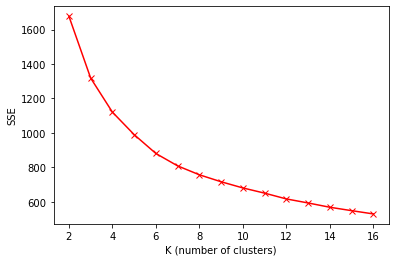

In [30]:
plt.plot(range(2,17), kmeansInertias, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

In [32]:
type(dfcopy)

numpy.ndarray

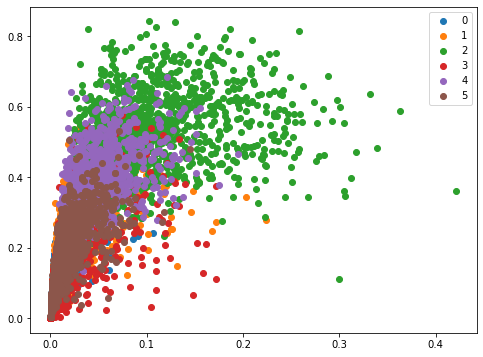

In [35]:
kmeans = KMeans(n_clusters= 6 ,random_state=0)
kmeans.fit(dfcopy)

label = kmeans.fit_predict(dfcopy)
fig, ax = plt.subplots(figsize=(8, 6))

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(dfcopy[label == i , 0] , dfcopy[label == i , 1] , label = i)
plt.legend()
plt.show()

# PCA

## Implementing PCA

In [13]:
#Importing required modules
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# cols = DfCopy2.columns
# ms = MinMaxScaler()
# Newdf = df.fit_transform(df)
Newdf = pd.DataFrame(df, columns=[cols])
#Load Data
pca = PCA(2)

#Transform the data
Newdf = pca.fit_transform(df)
data = Newdf.copy()
Newdf = pd.DataFrame(Newdf)

In [14]:
type(data)

numpy.ndarray

In [15]:
kmeansInertias = []
clusterCenters = []
for k in range(2,17):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(Newdf)
    clusterCenters = kmeans.cluster_centers_
    kmeansInertias.append(kmeans.inertia_)
kmeansInertiasTable = pd.DataFrame(kmeansInertias, columns=['SSE'], index=list(range(2,17)))
kmeansInertiasTable = kmeansInertiasTable.transpose()
kmeansInertiasTable

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
SSE,986.067157,630.398613,493.220673,374.525072,320.270649,277.459601,240.871333,209.802524,193.13515,176.761668,162.234691,149.714569,138.867797,130.141548,122.923157


## Elbow Method

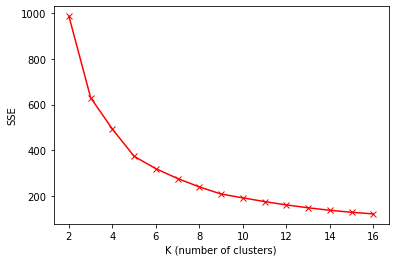

In [16]:
plt.plot(range(2,17), kmeansInertias, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

## Plot data with K = 5

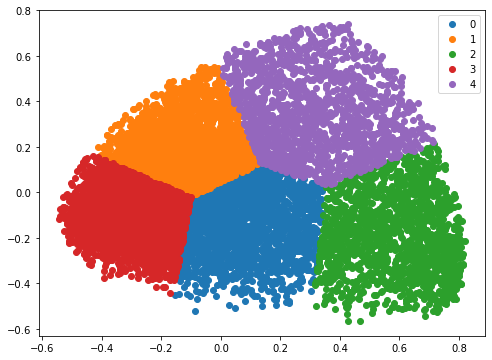

In [34]:
kmeans = KMeans(n_clusters= 5 ,random_state=0)
kmeans.fit(data)

label = kmeans.fit_predict(data)
fig, ax = plt.subplots(figsize=(8, 6))

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()